# Lesson 9 The Trapezoid method (TDVI)
<p dir="rtl" style="text-align: right;">
בשבוע שעבר דיברנו על סיגנל ספקטרלי אופייני לצמחים (באדום ובא"א) . היחס ביניהם הוא בסיס להרבה אינדקסים. דיברנו על NDVI.
<p dir="rtl" style="text-align: right;">
לחות הקרקע וסוג הקרקע ישנו גם את ערך NDVI כי מים בקרקע ישנו את ההחזריות בNIR.
ראינו שיש קשר לא רע בין אידוי דיות למדדי צומח כמו NDVI.
<p dir="rtl" style="text-align: right;">
אידוי דיות משפיע על הטמפ' גם כי נצרכת אנרגיה . אם נסתכל על השינוי של טמפ' העלה בזמן אפשר לראות שהיא מושפעת מהמשוואת האנרגיה.
יש קשר פיזיקלי בין טמפ' העלה לבין האידוי דיות ולכן גם יש קשר למדד נדוי לבין טמפ' העלה. ההנחה היא שטמפ' האויר יחסית קבועה ביחס לטמפ' העלה או הקרקע ואז אפשר למצוא קשר ישיר בין טמפ' העלה לדיות. ככל שחם יותר בעלה יש פחות דיות.
<p dir="rtl" style="text-align: right;">
## שיטת הטרפזואיד
<p dir="rtl" style="text-align: right;">
שיטה זו היא יותר אמפירית ודורשת הנחות מסוימות. אחת מהן היא מה שאמרנו שיש קשר בין אידוי דיות לטמפ' העלה ולכן גם לנדוי.(
  השיטה רלוונטית להרבה מדדי צומח שקשורים לאידוי דיות . 
  בטמפ' קרה (ההפרש נמוך יותר) נדוי גבוה יותר ואז מצאנו קשר גם לטמפ' הקרקע.
  
  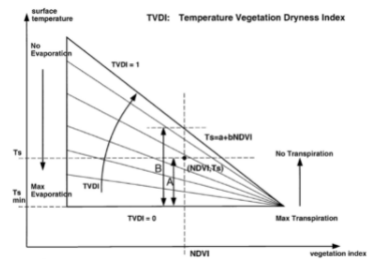

הטרפזואיד מחולק לקוים שכל אחד מייצג תכולת מים שונה בקרקע. עבור נקודה מסוימת ההפרש בין המרחק של הערך הנוכחי למרחק המקסימלי הוא מדד ללחות הקרקע. 

יש חשיבות לזמן של המדידה כי כל הטפז משתנה ולכן החישוב ישתנה. חשוב שבנדוי וטמפ' הקרקע/עלה יהיו על אותו תאריך.
</p>







In [ ]:
#You'll probably need to install these packages:
!pip install geopandas 
!pip install rasterio 
!pip install rioxarray

# shapely needs to be reinstalled to use the same geos install as cartopy (https://github.com/SciTools/cartopy/issues/871)
!pip uninstall -y shapely
!pip install --no-binary shapely shapely
!pip install cartopy

     |████████████████████████████████| 1.0MB 36.0MB/s 
     |████████████████████████████████| 15.4MB 251kB/s 
     |████████████████████████████████| 6.6MB 45.0MB/s 
     |████████████████████████████████| 19.3MB 1.4MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for rioxarray: filename=rioxarray-0.4.1.post0-cp37-none-any.whl size=51773 sha256=f330bec1ddd6e48956c46f2eeb436ba7793a7fe74146c13ee2acb0859a7d2f11
  Stored in directory: /root/.cache/pip/wheels/f4/0e/b8/bbae7f8384ce9e845ea9c3f94dd83ab7f3e5db8ec52d7e81ab
Successfully built rioxarray
Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1
     |████████████████████████████████| 389kB 28.2MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 whi

In [ ]:
  
import gdal
import rasterio
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy
import xarray as xr
from scipy import stats 
import geopandas as gpd
import rasterio
from rasterio.plot import show
import numpy as np
import scipy
from matplotlib import ticker
import cartopy.crs as ccrs
import sklearn.metrics as metrics

In [ ]:
# Import GEE for python and get into your account
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=AzzQtyQJ_u0GB6tzai-jphJHkPut8Is8YOlc4LYyRFE&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g5rLJfbTaO-bA616LNoxIb0I4MjOmRGAxZ20HevL-aMqeKGQloToo4

Successfully saved authorization token.


In [ ]:
# Go to GEE and download data (image/s) for your AOI (data file/s will be downloaded to your Google Drive account)

img = ee.Image('MODIS/006/MOD13A2/2017_03_22').select('NDVI');
fc= ee.FeatureCollection('users/davidhelman1/Spain_AOI_for_TVDI');

task = ee.batch.Export.image.toDrive(image=img,     # an ee.Image object.
                                     region         = fc.geometry().bounds(), # an ee.Geometry object.
                                     description    = '16-day NDVI average',
                                     folder         = 'gdrive_folder',
                                     fileNamePrefix = 'NDVI_22_03_2017',
                                     scale          = 1000,
                                     crs='EPSG:4326')
task.start()
# MOD13A2 - NDVI 16d 1km (22/03/2017)

In [ ]:
# Go to GEE and download data (image/s) for your AOI (data file/s will be downloaded to your Google Drive account)

img = ee.Image('MODIS/006/MOD11A1/2017_03_15').select('LST_Day_1km');
fc= ee.FeatureCollection('users/davidhelman1/Spain_AOI_for_TVDI');

task = ee.batch.Export.image.toDrive(image=img,     # an ee.Image object.
                                     region         = fc.geometry().bounds(), # an ee.Geometry object.
                                     description    = 'Daytime Land Surface Temperature',
                                     folder         = 'gdrive_folder',
                                     fileNamePrefix = 'LST_15_03_2017_new',
                                     scale          = 1000,
                                     crs='EPSG:4326')
task.start()
# MOD11A1 - LST 1d 1km (15/03/2017)

In [ ]:
# Notice that you need to download the TIF files from GEE (using the procedure that we already used before)
# and save the files in your folder or Google Drive, if you use the Google Colab...

# Read the TIF files using rasterio
NDVI = rasterio.open('/content/drive/MyDrive/gdrive_folder/NDVI_22_03_2017.tif')
NDVI = NDVI.read(1) # read the data from the TIF file
NDVI = NDVI*0.0001  # data need to be scaled for this product
NDVI[NDVI <= 0.0] = np.nan # replace invalid, negative values with nan

LST = rasterio.open('/content/drive/MyDrive/gdrive_folder/LST_15_03_2017_new.tif')
LST = LST.read(1)   # read the data from the TIF file
LST = LST*0.02      # data need to be scaled for this product

# Replace all zeros with nan
LST[LST == 0.0] = np.nan

# Round values to 2 places after the decimal point (not sure that this is necessary)
TS   = np.round(LST, 2)
NDVI = np.round(NDVI, 2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0, 0.5, 'number of  pixels')

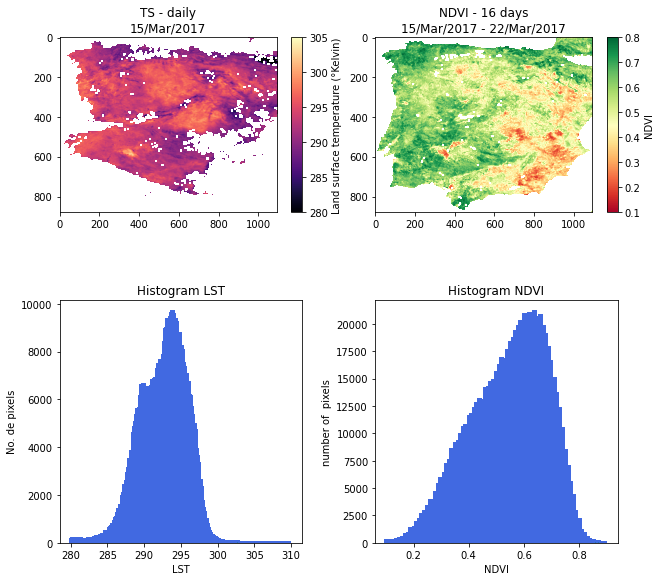

In [ ]:
  
# Prepare for plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.subplots_adjust(left=0.125, right = 0.9, wspace=0.3)

# Subplot LST
img1 = ax1.imshow(TS, cmap='magma', vmin=280, vmax=305)
ax1.set_title("TS - daily\n15/Mar/2017")
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(img1, cax=cax1)
cbar.set_label("Land surface temperature (°Kelvin)")

# Subplot NDVI
img2 = ax2.imshow(NDVI, cmap='RdYlGn', vmin=0.1, vmax=0.8)
ax2.set_title("NDVI - 16 days\n15/Mar/2017 - 22/Mar/2017")
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(img2, cax=cax2)
cbar.set_label("NDVI")

# Subplot Histogram LST
img3 = ax3.hist(TS.ravel(), bins=256, range=(280, 310), lw=4, ec='royalblue')
ax3.set_aspect(1./ax3.get_data_ratio())
ax3.set_title("Histogram LST")
ax3.set_xlabel('LST')
ax3.set_ylabel('No. de pixels')

# Subplot Histogram NDVI
img4 = ax4.hist(NDVI.ravel(), bins=256, range=(0.1, 0.9), lw=4, ec='royalblue')
ax4.set_aspect(1./ax4.get_data_ratio())
ax4.set_title("Histogram NDVI")
ax4.set_xlabel('NDVI')
ax4.set_ylabel('number of  pixels')

In [ ]:
  
# Exclude values that are greater than 3 std from the LST data 
std  = np.nanstd(TS)  # calculate std
mean = np.nanmean(TS) # calculate mean

lower_limit = mean - (std*3)
upper_limit = mean + (std*3)

np.where(TS, TS < lower_limit, np.nan)
np.where(TS, TS > upper_limit, np.nan)

print("Minimum limit:", np.nanmin(TS), "°K")
print("Maximum limit:", np.nanmax(TS), "°K")

Minimum limit: 271.34 °K
Maximum limit: 303.48 °K


In [ ]:
# Excluse negative NDVI values from image
NDVI[NDVI < 0] = np.nan

# List minimum LST (humid limit) and maximum LST (dry limit)
MiniList    = []
MaxList     = []

# Create an NDVI vector (0 to 1 with intervals of 0.01)
NDVI_vector = np.round(np.arange(0.01, 1.01, 0.01), 2)

# Find LST values for each NDVI value:
for val in NDVI_vector:
  TS_lst_val = []
  row, col = np.where(NDVI == val) # find real NDVI values that correspond to NDVI values in the created vector
  # For each NDVI value get temperatures
  # Assign a place to these values (rows and columns)
  for i in range(len(row)):
    if np.isfinite(TS[row[i], col[i]]): # exclude nan
      TS_lst_val += [TS[row[i], col[i]]]
  
  # Find if there are LST values that correspond to the NDVI values and take 
  # only maximum and minimum values
  if TS_lst_val != []:
    TS_min_val = np.min(TS_lst_val)
    TS_max_val = np.max(TS_lst_val)
  else:
    TS_min_val = np.nan # all others get nan
    TS_max_val = np.nan

  # Add found values to MiniList e MaxList lists
  MiniList += [TS_min_val]
  MaxList  += [TS_max_val]

# Create line for minimum, lower border
MiniList_fin = []
NDVI_fin     = []
for i, val in enumerate(MiniList):# exclude nan again
  if np.isfinite(val):
    MiniList_fin += [val]
    NDVI_fin += [NDVI_vector[i]]

# Get the (a and b) coefficients of the lower linear regression
MinPfit = np.polyfit(NDVI_fin[17:], MiniList_fin[17:], 1)

# Create line for maximum border
MaxList_fin = []
NDVI_fin = []
for i, val in enumerate(MaxList):
  if np.isfinite(val):
    MaxList_fin += [val]
    NDVI_fin += [NDVI_vector[i]]

# Get the (a' and b') coefficients of the upper linear regression
MaxPfit = np.polyfit(NDVI_fin[17:], MaxList_fin[17:], 1)

# Generate the first and last wet limit and dry limit points
a1, b1 = MaxPfit
a2, b2 = MinPfit
linhamax = [b1 + (a1 * 0), b1 + (a1 * 1)]# max linear regression for trapez
linhamin = [b2 + (a2 * 0), b2 + (a2 * 1)]# min linear regression for trapez

Text(0.5, 1.0, 'NDVI vs  LST')

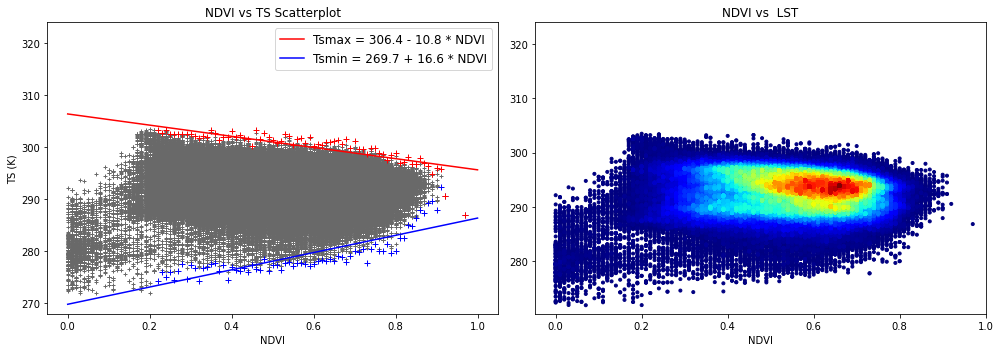

In [ ]:
# Plot the Trapez and a density scatterplot
bins = [316, 316] # number of bins

#for density plot-
x1 = NDVI.flatten()
y1 = TS.flatten()

# take only existing values of both, NDVI and LST
mask = ~np.isnan(x1) & ~np.isnan(y1) 

x = x1[mask]
y = y1[mask]

# Histogram the data
hh, locx, locy = np.histogram2d(x, y, bins=bins)

# Sort the points by density, so that the densest points are plotted last
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

# Plot data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

ax1.plot(NDVI.ravel(), TS.ravel(), "+", color='dimgray', markersize=4)
ax1.plot(NDVI_vector[21:], MiniList[21:], '+', color='b')
ax1.plot(NDVI_vector[21:], MaxList[21:], '+', color='r')
ax1.plot([0, 1], linhamax, color='r', markersize=8,\
                 label=f"Tsmax = {'%.1f'% b1} - {'%.1f' % abs(a1)} * NDVI")
ax1.plot([0, 1], linhamin, color='b', markersize=8,\
                 label=f"Tsmin = {'%.1f' % b2} + {'%.1f' % abs(a2)} * NDVI")
ax1.legend(loc='upper right', fontsize=12)
ax1.set_ylim(top=324)
ax1.set_xlabel("NDVI")
ax1.set_ylabel("TS (K)")
ax1.set_title("NDVI vs TS Scatterplot")

ax2.scatter(x2, y2, c=z2, cmap='jet', marker='.')
ax2.set_xlabel("NDVI")
ax2.set_ylim(top=324)
ax2.set_xlim(right=1.)
ax2.set_title("NDVI vs  LST")

In [ ]:
# Use the linear regressions' coefficients to derive TVDI 
a1, b1 = MaxPfit
a2, b2 = MinPfit

Ts_max = b1 + (a1 * NDVI)
Ts_min = b2 + (a2 * NDVI)

TVDI = (TS - Ts_min) / (Ts_max - Ts_min)
print(np.nanmin(TVDI))
print(np.nanmax(TVDI))

-0.2447888316218001
1.1352731745977624


In [ ]:
# Save the TVDI array as a TIF file (using metadata from teh LST TIF file)
with rasterio.open('/content/drive/MyDrive/gdrive_folder/LST_15_03_2017_new.tif') as src:
    raster = src.read(1)   

kwargs = src.meta

# Update kwargs (change in data type)
kwargs.update( dtype=rasterio.float64, count = 1)

with rasterio.open('TVDI.tif', 'w', **kwargs) as dst:
          dst.write_band(1, TVDI.astype(rasterio.float64))

EPSG:4326
1
-5.32146 41.39392
-5.24704 41.3001
-5.42922 41.38134
-5.5485 41.37338
-5.47708 41.18264
-5.5919 41.27473


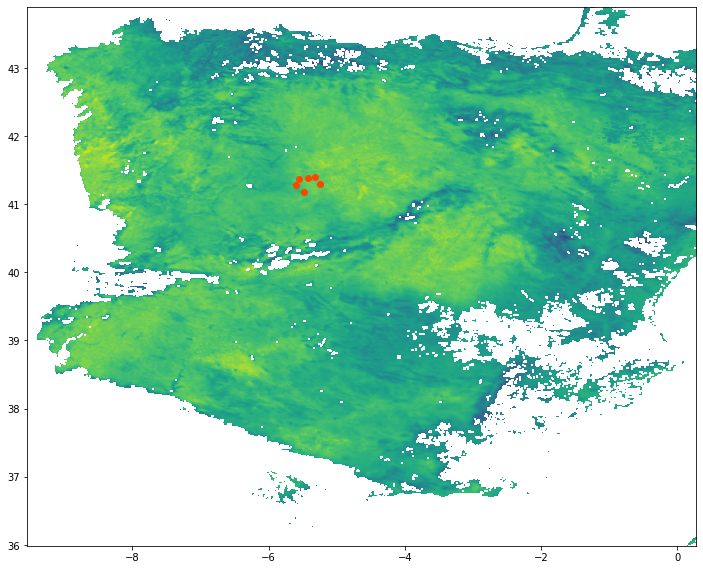

In [ ]:
# Get the SM data from the shapefile
soil_mostire_list = []
TVDI_list = []

# Open point shapefile
pointData  = gpd.read_file('/content/drive/MyDrive/gdrive_folder/data_sm.shp') # YOU NEED to upload the data first, of course!

# Get TVDI raster
tvdiRaster = rasterio.open('/content/drive/MyDrive/gdrive_folder/TVDI.tif')

print(tvdiRaster.crs)
print(tvdiRaster.count)

# Show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
pointData.plot(ax=ax, color='orangered')
show(tvdiRaster, ax=ax)

for point in pointData['geometry']:
    print(point.xy[0][0],point.xy[1][0])
    
index = -1   
for point in pointData['geometry']:
    x = point.xy[0][0]
    y = point.xy[1][0]
  
    index += 1

    soil_mostire =pointData["SM"][index]
    row, col = tvdiRaster.index(x,y)
    TVDI=tvdiRaster.read(1)[row,col]
    TVDI_list.append(TVDI)
    soil_mostire_list.append(soil_mostire)

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


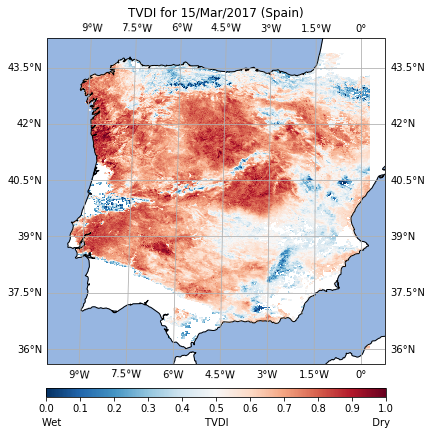

In [ ]:

# Let's plot the TVDI image nicely...
from matplotlib import ticker
import cartopy.crs as ccrs

TVDI = xr.open_rasterio(tvdiRaster)
array_input = TVDI

plt.figure(figsize=(9,6))

ax1 = plt.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN)
ax1.gridlines(draw_labels=True)

p1 = array_input.plot(ax=ax1,
             vmin=0, vmax=1,
             cmap='RdBu_r',
             transform=ccrs.PlateCarree(),
             add_colorbar=False)

plt.title('TVDI for 15/Mar/2017 (Spain)')

ax_cb = plt.axes([0.25, 0.05, 0.525, 0.02])
tick_locator = ticker.MaxNLocator(nbins=10)
cb = plt.colorbar(p1, cax=ax_cb, orientation='horizontal')
cb.locator = tick_locator
cb.update_ticks()
cb.ax.set_xlabel('Wet                                              TVDI                                              Dry');

Statistics:
MAE.       : 0.63 °C
RMSE.      : 0.64 °C
Pearson's-R: -0.85
P-value.   : 0.031



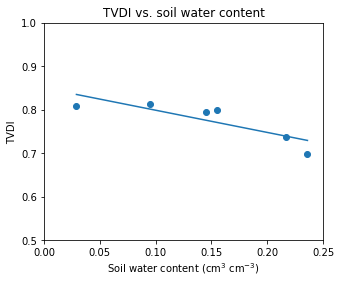

In [ ]:
import scipy
from matplotlib import ticker
import cartopy.crs as ccrs
import sklearn.metrics as metrics

Y_test = soil_mostire_list
Y_pred = TVDI_list

mae  = metrics.mean_absolute_error(Y_test, Y_pred)
mse  = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse) 
r2   = metrics.r2_score(Y_test, Y_pred)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Y_test, Y_pred)

print("Statistics:")
print("MAE.       : {:.2f}".format(mae),"\N{DEGREE SIGN}C")
print("RMSE.      : {:.2f}".format(rmse),"\N{DEGREE SIGN}C")
print("Pearson's-R: {:.2f}".format(r_value))
print("P-value.   : {:.3f}".format(p_value))
print('')

plt.figure(1,figsize=(5,4)).clf()
plt.scatter(Y_test,Y_pred)
plt.xlabel('Soil water content (cm$^{3}$ cm$^{-3}$)')
plt.ylabel('TVDI')
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)))
# pearson_coef = np.round(pearson_coef, 2)
plt.title('TVDI vs. soil water content')
plt.xlim([0, 0.25])
plt.ylim([0.5, 1.0])
plt.show()